### Data Description
The Wine Quality Dataset is a popular dataset used for regression and classification tasks, with a focus on predicting the quality of red or white wine based on various chemical properties. The dataset contains several features related to the chemical composition of the wine, as well as a target variable indicating wine quality.

In [32]:
#Importing pandas and numpy
import pandas as pd
import numpy as np
#Import data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay



### Data Preprocessing and Visualization

In [33]:
# Load the dataset
df = pd.read_csv('WineQT.csv')
#Checking the dataset head
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [34]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [35]:
# Explore the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [36]:
# Handle missing values if any (you can drop or impute them)
df.dropna(inplace=True)

In [37]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [38]:
# Feature selection: Using 'density' and 'acidity' as predictors, and 'quality' as the target variable
X = df.drop(['quality', 'Id'], axis = 1)  # Features
y = df['quality']  # Target (wine quality)

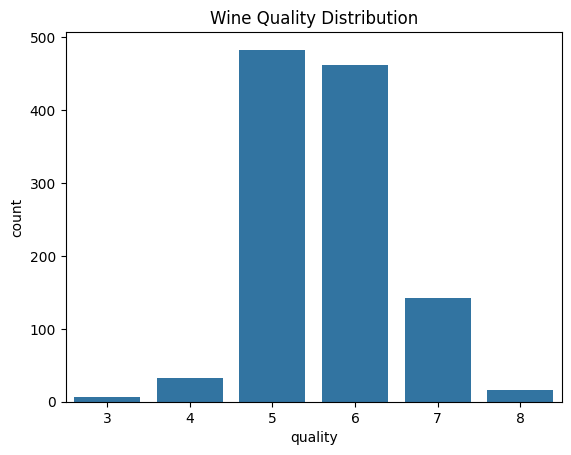

In [39]:
# Visualize distribution of wine quality
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()

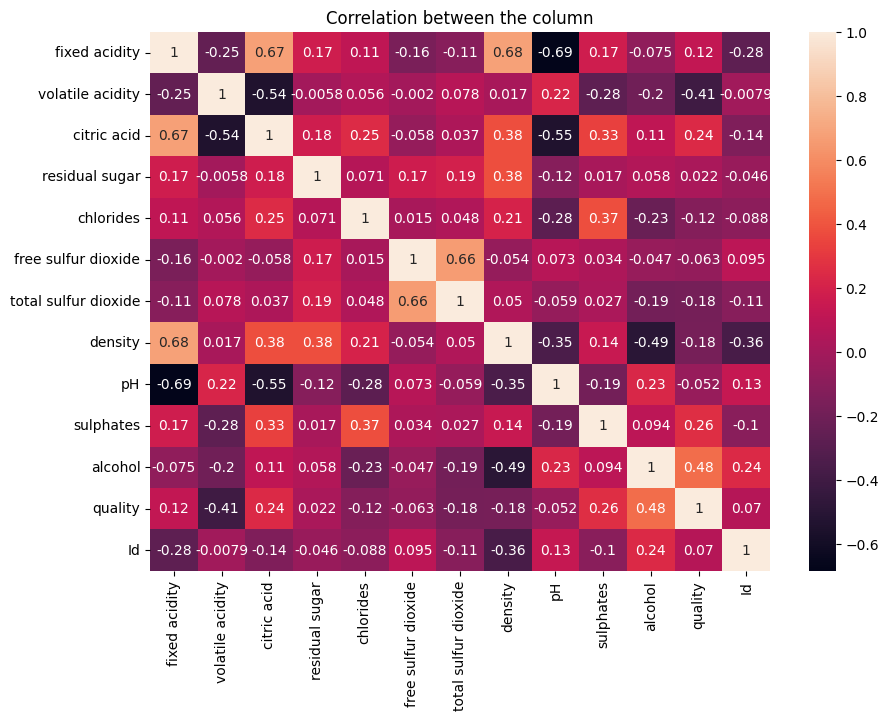

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the column")
plt.show()

In [41]:
df.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
Id                      0.069708
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

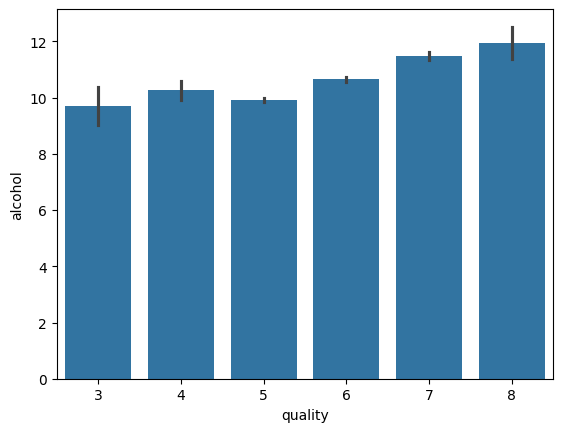

In [42]:
sns.barplot (x='quality', y='alcohol', data=df)
plt.show()

In this we can notice that alcohol is higher with respect to quality. So higher the amount of the alcohol higher would be the quality of the wine


### Data Processing

In [43]:
df['quality']= df.quality.apply( lambda x:1 if x>=7 else 0)

In [44]:
df['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

In [45]:
X= df.drop('quality', axis=1)
y=df['quality']

In [46]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Classifier model

##### Feature Selection 
Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [48]:
# Train Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
rf_pred= rf.predict(X_test)
rf_accuracy= accuracy_score(rf_pred, y_test)
print("Random Forest Classifier Performance:")
print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Random Forest Classifier Performance:
Accuracy: 91.84%


In [50]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       298
           1       0.74      0.58      0.65        45

    accuracy                           0.92       343
   macro avg       0.84      0.77      0.80       343
weighted avg       0.91      0.92      0.91       343



In [51]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (800, 12)
y_train  (800,)
X_test  (343, 12)
y_test  (343,)


### Stochastic Gradient Descent(SGD)

In [52]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

# Initialize and train the model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# Predictions and evaluation
sgd_pred = sgd_model.predict(X_test)
sgd_accuracy= accuracy_score(sgd_pred, y_test)
print("Stochastic Gradient Descent Classifier Performance:")
print("Accuracy: {:.2f}%".format(sgd_accuracy*100))

Stochastic Gradient Descent Classifier Performance:
Accuracy: 86.88%


#### Support Vector Machine

In [53]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [54]:
svc.fit(X_train, y_train)

SVC(random_state=42)

In [55]:
svc_preds = svc.predict(X_test)

In [56]:
svc_accuracy= accuracy_score(svc_preds, y_test)
print("Support Vector Classifier Performance:")
print("Accuracy: {:.2f}%".format(svc_accuracy*100))

Support Vector Classifier Performance:
Accuracy: 86.88%


####  Model Evaluation
After training each model, their performance needs to be evaluated. This includes accuracy, confusion matrix, and a classification report.


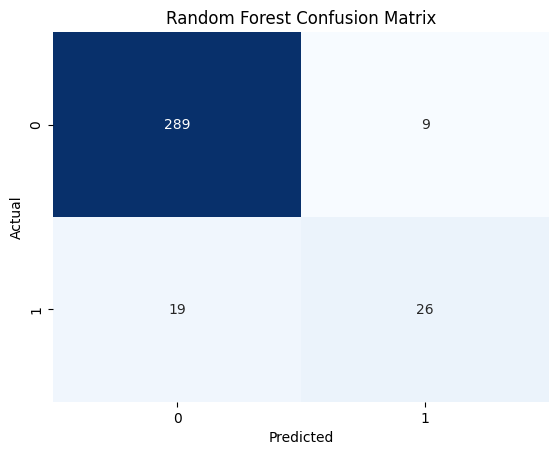

In [60]:
# Confusion Matrix for Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


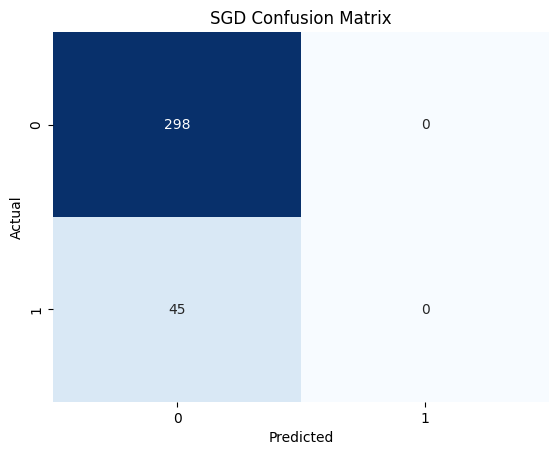

In [58]:
#confusion matrix for SGD
conf_matrix_rf = confusion_matrix(y_test, sgd_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SGD Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

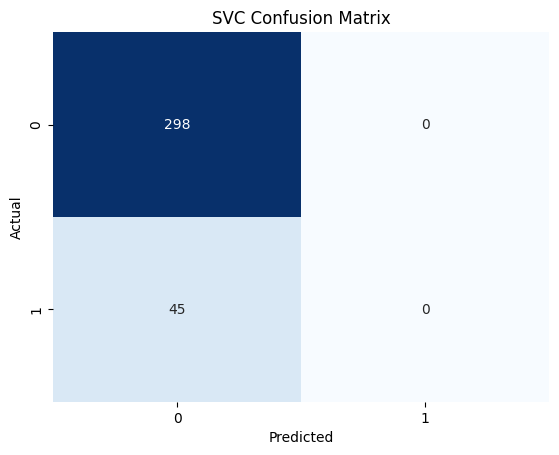

In [59]:
# confusion matrix for SVC
conf_matrix_rf = confusion_matrix(y_test, svc_preds)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

####  Data Visualization

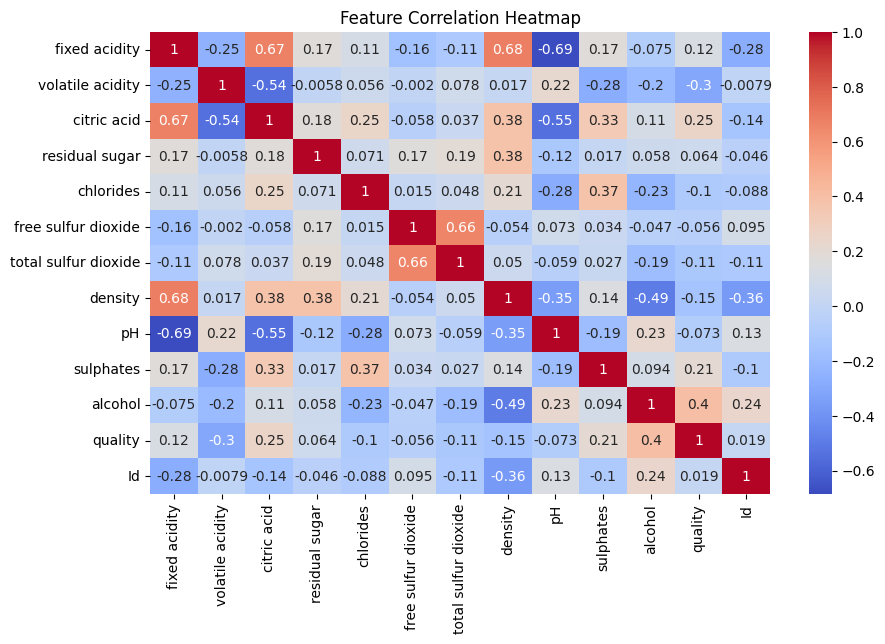

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


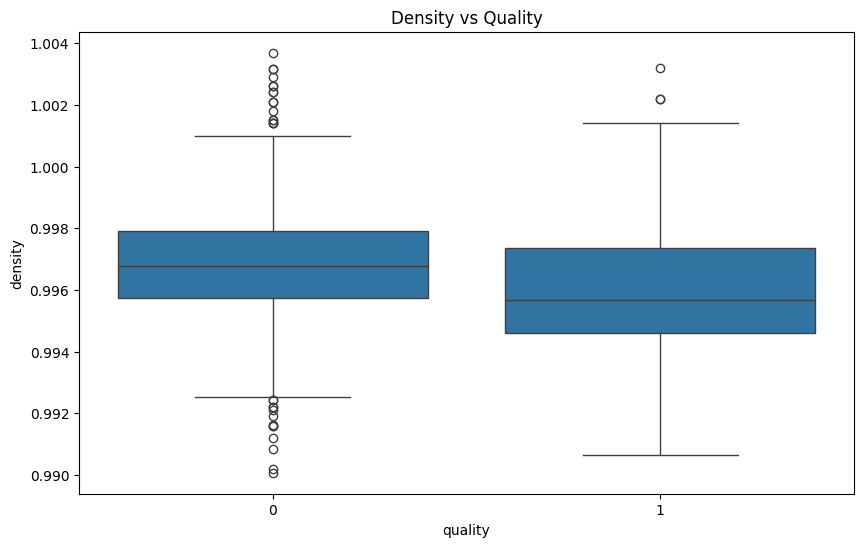

In [63]:
# Box plot for wine quality distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='density', data=df)
plt.title('Density vs Quality')
plt.show()


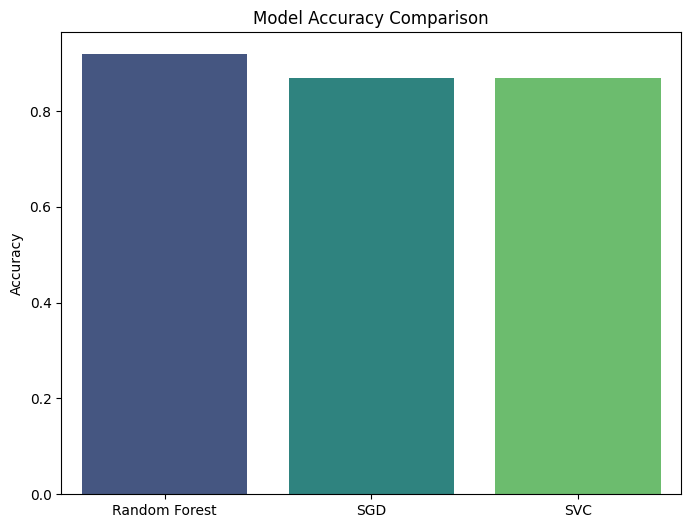

In [64]:
# Model Comparison Bar Plot
model_names = ['Random Forest', 'SGD', 'SVC']
accuracies = [rf_accuracy, sgd_accuracy, svc_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

This process demonstrates how to use Random Forest, SGD, and SVC to predict wine quality, utilizing Pandas for data manipulation, NumPy for numerical operations, and Seaborn and Matplotlib for data visualization. By comparing these classifiers, you can identify the most effective model for predicting wine quality based on its chemical composition.